# Scikit-Learn Notebook Model - Titanic Survival Prediction
## Introduction on making a model with Scikit_Learn
The task at hand is to use Scikit-Learn to make a model that predicts the survival of a passenger on the Titanic.

## Step 1: Import the necessary libraries

In [ ]:
#import titanic dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import lightgbm as lgb

###  Step 2: Exploring the data
The first step is to explore the data and see what we are working with. The data is stored in a excele file and has been read into a pandas dataframe. The firt 10 row of the data has been displayed above.

Now you need the shape of the data to see how many rows and columns are there in the data.

In [ ]:
#import this file files/titanic3.xls into a dataframe
titanic = pd.read_excel('../files/titanic3.xls')
titanic.head()  

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
titanic.shape

You will now get a list of the columns.

In [ ]:
titanic.columns

We can see it has 13 features and 1 target variable. The target variable is the Survived column. The features are the rest of the columns.

Next lets check the data types of the columns.

In [ ]:
titanic.dtypes

Now lets check for any missing values in the data.

Check for missing values in every feature column

In [ ]:
#check for missing values
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

* There are 263 missing values in the Age column.
* There are 1 missing values in the Fare column.
* There are 1014 missing values in the Cabin column.
* There are 2 missing values in the Embarked column.
* There are 823 missing values in the Boat column.
* There are 1188 missing values in the Body column.
* There are 564 missing values in the home.dest column.
* There are 2 missing values in the embarked column.

Since the many columns have missing values, I would have to drop them all except a column where I can fill with the mean of the column. So columns like Cabin, Boat, Body, home.dest would be dropped.

To make this data more usable for machine we would have to drop features that are not useful for the model. So we would drop the name, ticket, cabin, boat, body, home.dest, embarked and sibsp.

The reason for dropping some columns are as follows:
* Name: The name of the passenger is not useful for the model as it does not have any impact on the survival of the passenger.
* Ticket: The ticket number is not useful for the model as it does not have any impact on the survival of the passenger.
* Cabin: The cabin number is not useful for the model as it does not have any impact on the survival of the passenger.
* Boat: The boat number is not useful for the model as it the passenger already surived if he was on a boat, this would make the model overfit.
* Body: The body although is useful for the model but since it has 1188 missing values, it would be better to drop it.
* Home.dest: The home destination of the passenger is not useful for the model as it does not have any impact on the survival of the passenger.

In [ ]:
#delete features that are not useful
titanic.drop(['name','ticket','cabin','boat','body','home.dest','embarked','sibsp'], axis=1, inplace=True)
titanic.head()

,pclass,survived,sex,age,parch,fare
0,1,1,female,29.0000,0,211.3375
1,1,1,male,0.9167,2,151.5500
2,1,0,female,2.0000,2,151.5500
3,1,0,male,30.0000,2,151.5500
4,1,0,female,25.0000,2,151.5500


Now lets drop all rows with null values in the dataset and check the shape of the data.

In [ ]:
#remove row with missing values
titanic.dropna(inplace=True)
titanic.shape

To make the dataset usable by a ML algorithm we have to change the categorical features. We do this using label encoding. So we have to change the gender in from male to female to 0 and 1 respectively. Also we have to change the Embarked column to numerical values. So we have to change the values in the Embarked column to 0, 1 and 2 respectively.

In [ ]:
titanic['sex'] = titanic['sex'].replace({'male': 1, 'female': 0})
titanic.shape

(1309, 6)

Lets have some insights on the data
Lets plot the survival of the sex 

<Axes: >

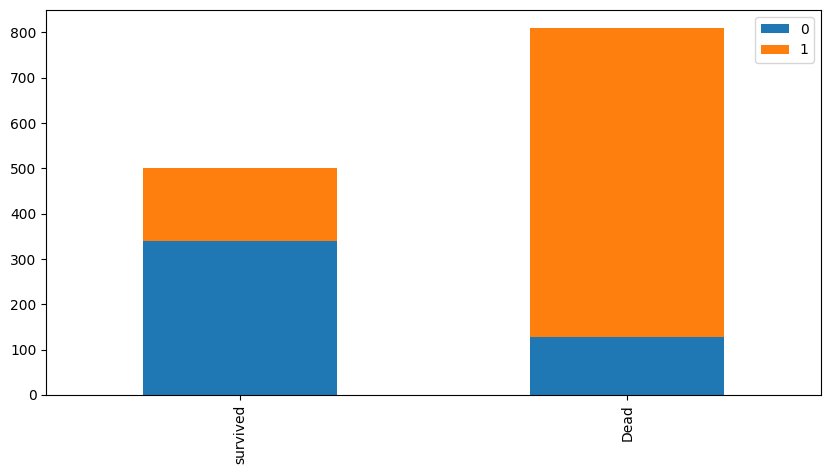

In [ ]:

survived = titanic[titanic['survived']==1]["sex"].value_counts()
dead = titanic[titanic['survived']==0]["sex"].value_counts()
df_survived_dead = pd.DataFrame([survived,dead])
df_survived_dead.index = ['survived','Dead']
df_survived_dead.plot(kind='bar',stacked=True, figsize=(10,5))


Plot the survival based on the classes of the ticket

<Axes: >

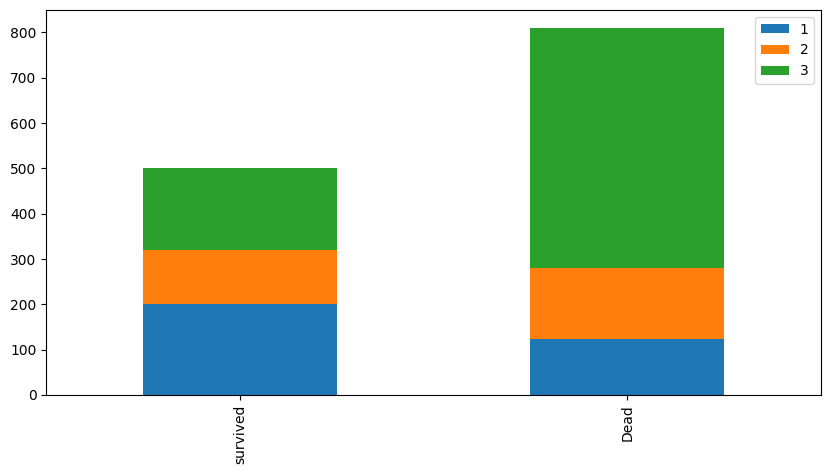

In [ ]:
survived = titanic[titanic['survived']==1]["pclass"].value_counts().reindex([1, 2, 3])
dead = titanic[titanic['survived']==0]["pclass"].value_counts().reindex([1, 2, 3])
df = pd.DataFrame([survived,dead])
df.index = ['survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

Lets see whats left of the data now

In [ ]:
titanic.head()

,pclass,survived,sex,age,parch,fare
0,1,1,0,29.0000,0,211.3375
1,1,1,1,0.9167,2,151.5500
2,1,0,0,2.0000,2,151.5500
3,1,0,1,30.0000,2,151.5500
4,1,0,0,25.0000,2,151.5500


 Now, we want to explore the relationships between the features and the target variable, 'survived'. To do this, we can calculate the correlation matrix between the features and the target variable. This will help us identify which features have a strong correlation with the target variable and can be used to build a predictive model. We will use the seaborn library to plot a heatmap of the correlation matrix.

 As we can there is no feature which has zero correlation with the target variable. So we can use all the features to build our model.

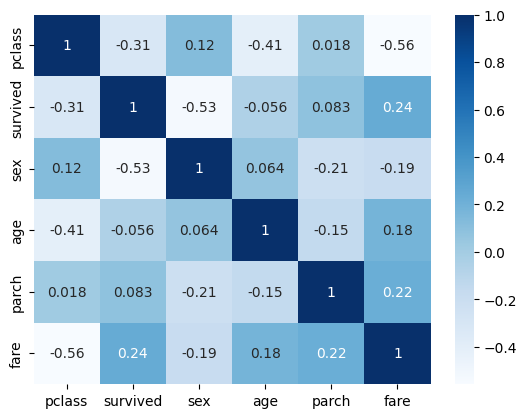

In [ ]:
# Calculate the correlation matrix
corr = titanic.corr()
# Plot the heatmap
sns.heatmap(corr, annot=True, cmap="Blues")
plt.show()

Another easier way os to use a bar chart to visualize the correlation between the features and the target variable. We can use the plot function in seaborn to do this. Bar chart pointing downwards means negative correlation and bar chart pointing upwards means positive correlation.

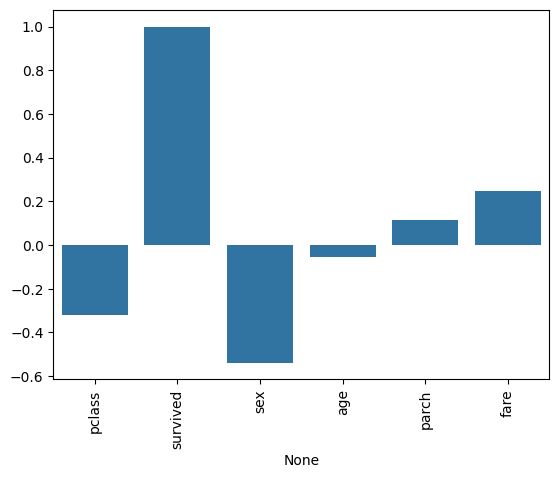

pclass     -0.319979
survived    1.000000
sex        -0.537719
age        -0.053958
parch       0.114091
fare        0.249164
dtype: float64


In [ ]:
corr_matrix = titanic.corrwith(titanic['survived'])

sns.barplot(x=corr_matrix.index, y=corr_matrix.values)

plt.xticks(rotation=90)

plt.show()

print(corr_matrix)

Now lets check to find some outliers in the data. We can use the boxplot function in seaborn to do this. As we can see below thre are some outliers in fare, age and parch. The only way to find out if removing these outliers would thorw off my model was by training it and doing that reduced the accuracy of my model. So I decided to keep the outliers.

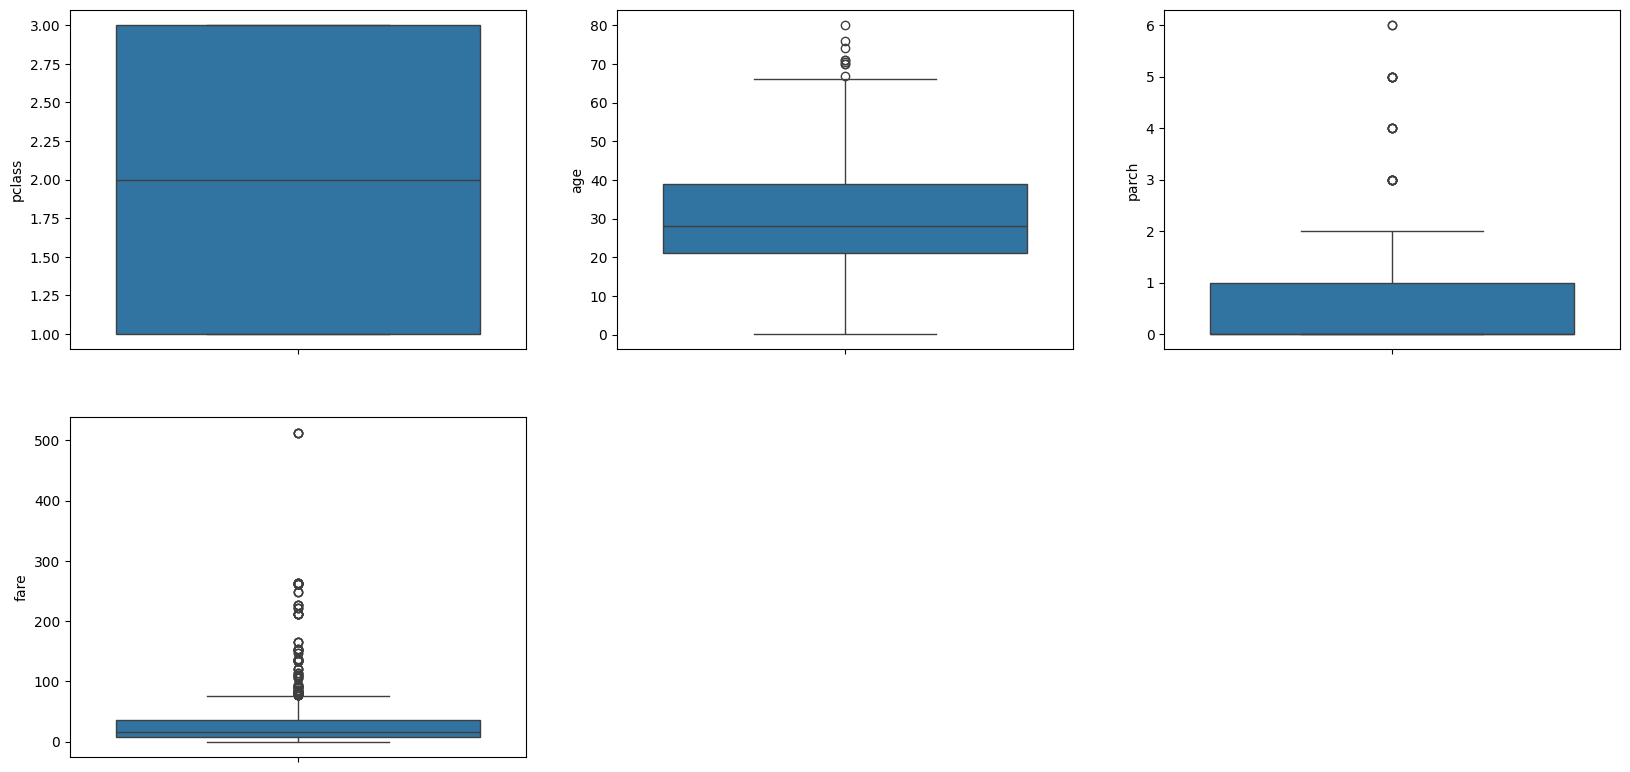

(1045, 6)

In [ ]:
#plot a boxplot for all the features to see the outliers
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(titanic['pclass'])
plt.subplot(3,3,2)
sns.boxplot(titanic['age'])
plt.subplot(3,3,3)
sns.boxplot(titanic['parch'])
plt.subplot(3,3,4)
sns.boxplot(titanic['fare'])
plt.show()

#show the number of rows and columns
titanic.shape

## Step 3: Preparing the data for the model

Assign the features to X and the target variable to y

In [ ]:
feature_cols = ['pclass', 'age', 'parch', 'fare']

x = titanic[feature_cols]
y = titanic[['survived']] # target variable

Split the data into training and testing data using train_test_split function in sklearn with a test size of 0.2

In [ ]:
# split x and y into training and testing sets
from sklearn.model_selection import train_test_split # import train_test_split function from sklearn

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25) # 75% training and 25% test

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_leaf_nodes': [31, 63, 127]
}

# Create a GradientBoostingClassifier
clf = GradientBoostingClassifier()

# Create a grid search CV object
model = GridSearchCV(clf, param_grid, cv=5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the best hyperparameters
best_params = model.best_params_

# Evaluate the model on the test data
model = model.predict(X_test)
accuracy = accuracy_score(y_test, model)

print('Accuracy:', accuracy)



/Users/charlesnanakwakye/cloud_AI_Group4/venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlesnanakwakye/cloud_AI_Group4/venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlesnanakwakye/cloud_AI_Group4/venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/charlesnanakwakye/cloud_AI_Group4/venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWar

Accuracy: 0.6984732824427481


/Users/charlesnanakwakye/cloud_AI_Group4/venv/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


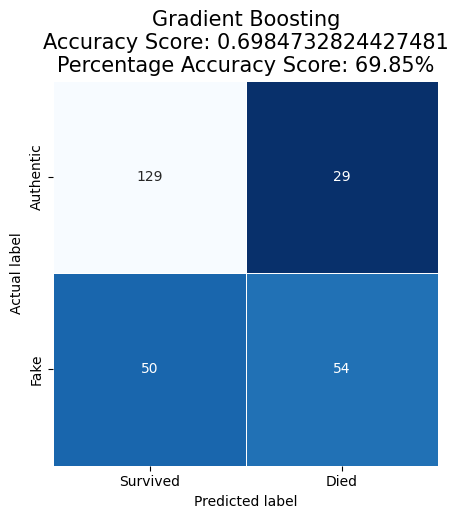

In [ ]:
#generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix




#print the confusion matrix

gradientBoostingAlgoPredCM = confusion_matrix(y_test, model)
plt.figure(figsize=(5,5))
sns.heatmap(gradientBoostingAlgoPredCM, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r', cbar=False, xticklabels=['Survived', 'Died'], yticklabels=['Survived', 'Died'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

accuracy_score = metrics.accuracy_score(y_test, model)
percentage_accuracy_score = f'{accuracy_score:.2%}'
all_sample_title = f'Gradient Boosting\nAccuracy Score: {accuracy_score}\nPercentage Accuracy Score: {percentage_accuracy_score}'
plt.title(all_sample_title, size = 15)
plt.show()


In [ ]:
# Save the models
import pickle
pickle.dump(model, open('saved_models/scikit_titanic_model.pkl', 'wb'))

